In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv(r"C:\Users\uniqu\Downloads\archive\Customers.csv")
df.head(10)

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6
5,6,Female,22,58000,76,Artist,0,2
6,7,Female,35,31000,6,Healthcare,1,3
7,8,Female,23,84000,94,Healthcare,1,3
8,9,Male,64,97000,3,Engineer,0,3
9,10,Female,30,98000,72,Artist,1,4


In [3]:
df.shape

(2000, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


In [5]:
df.describe()

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,48.960000,110731.821500,50.962500,4.102500,3.768500
std,577.494589,28.429747,45739.536688,27.934661,3.922204,1.970749
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,500.750000,25.000000,74572.000000,28.000000,1.000000,2.000000
50%,1000.500000,48.000000,110045.000000,50.000000,3.000000,4.000000
75%,1500.250000,73.000000,149092.750000,75.000000,7.000000,5.000000
max,2000.000000,99.000000,189974.000000,100.000000,17.000000,9.000000


In [6]:
df.isnull().sum()

CustomerID                 0
Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64

In [7]:
# im handling the missing values in the Profession column
df['Profession'] = df['Profession'].fillna('Unknown')

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
# I dropped the CustomerID column because it is not useful for clustering
df.drop(columns=['CustomerID'], inplace=True)

In [10]:
df["Gender"].value_counts()

Gender
Female    1186
Male       814
Name: count, dtype: int64

In [11]:
df["Profession"].value_counts()

Profession
Artist           612
Healthcare       339
Entertainment    234
Engineer         179
Doctor           161
Executive        153
Lawyer           142
Marketing         85
Homemaker         60
Unknown           35
Name: count, dtype: int64

In [12]:
# Convert categorical variables to numerical
df = pd.get_dummies(df, columns=['Gender', 'Profession'], dtype=int)

In [13]:
# 0 = false, 1 = true
df.head()

,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size,Gender_Female,Gender_Male,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Profession_Unknown
0,19,15000,39,1,4,0,1,0,0,0,0,0,1,0,0,0,0
1,21,35000,81,3,3,0,1,0,0,1,0,0,0,0,0,0,0
2,20,86000,6,1,1,1,0,0,0,1,0,0,0,0,0,0,0
3,23,59000,77,0,2,1,0,0,0,0,0,0,0,0,1,0,0
4,31,38000,40,2,6,1,0,0,0,0,1,0,0,0,0,0,0


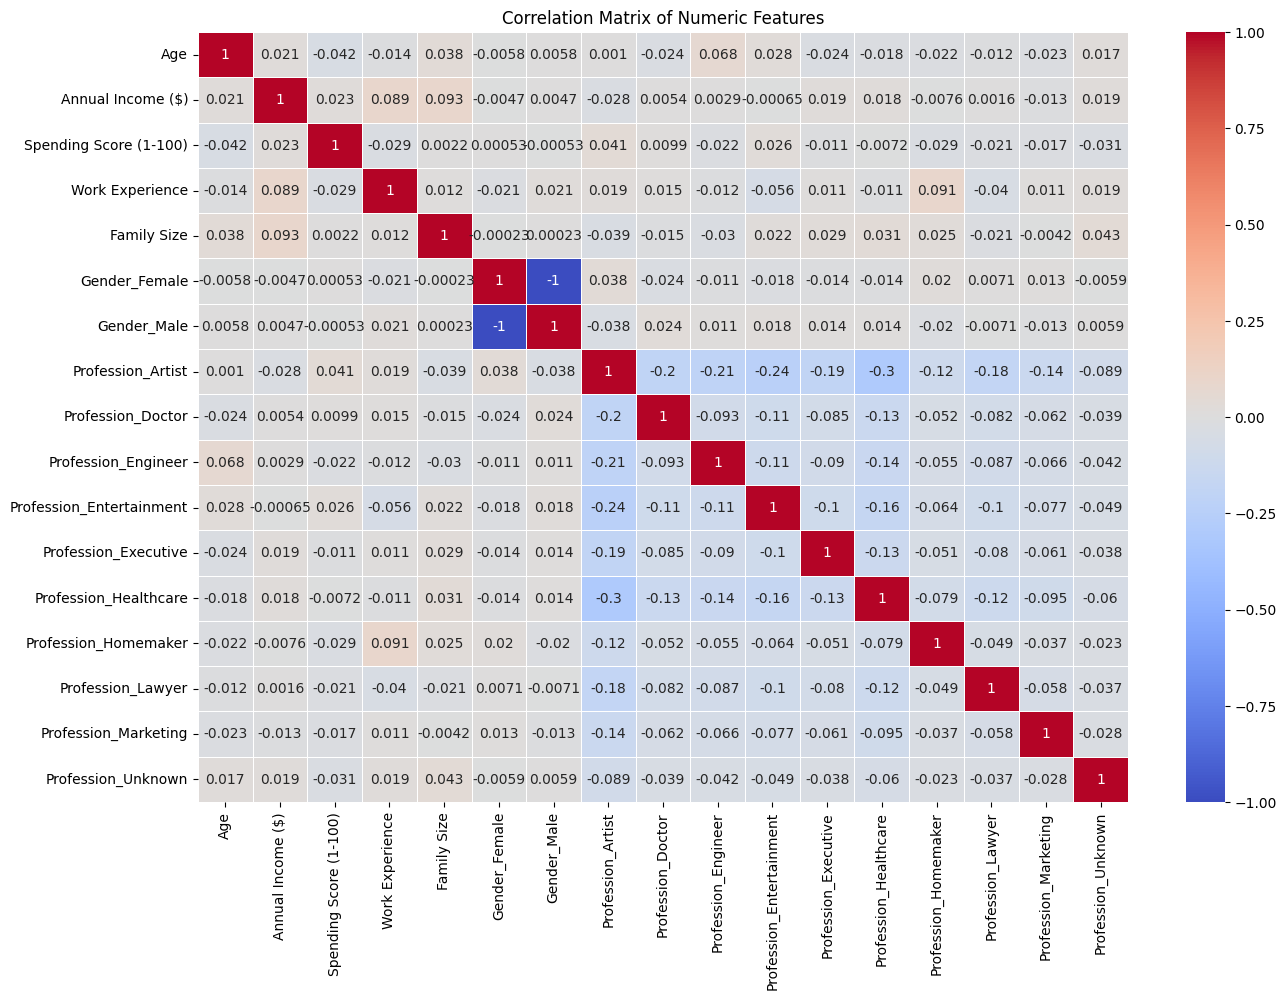

In [14]:
numeric_df = df.select_dtypes(include='number')

corr_matrix = numeric_df.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix of Numeric Features")
plt.show()


C:\Users\uniqu\AppData\Local\Temp\ipykernel_18028\2583350092.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[2, 0].set_xticklabels(profession_columns, rotation=45, ha='right')


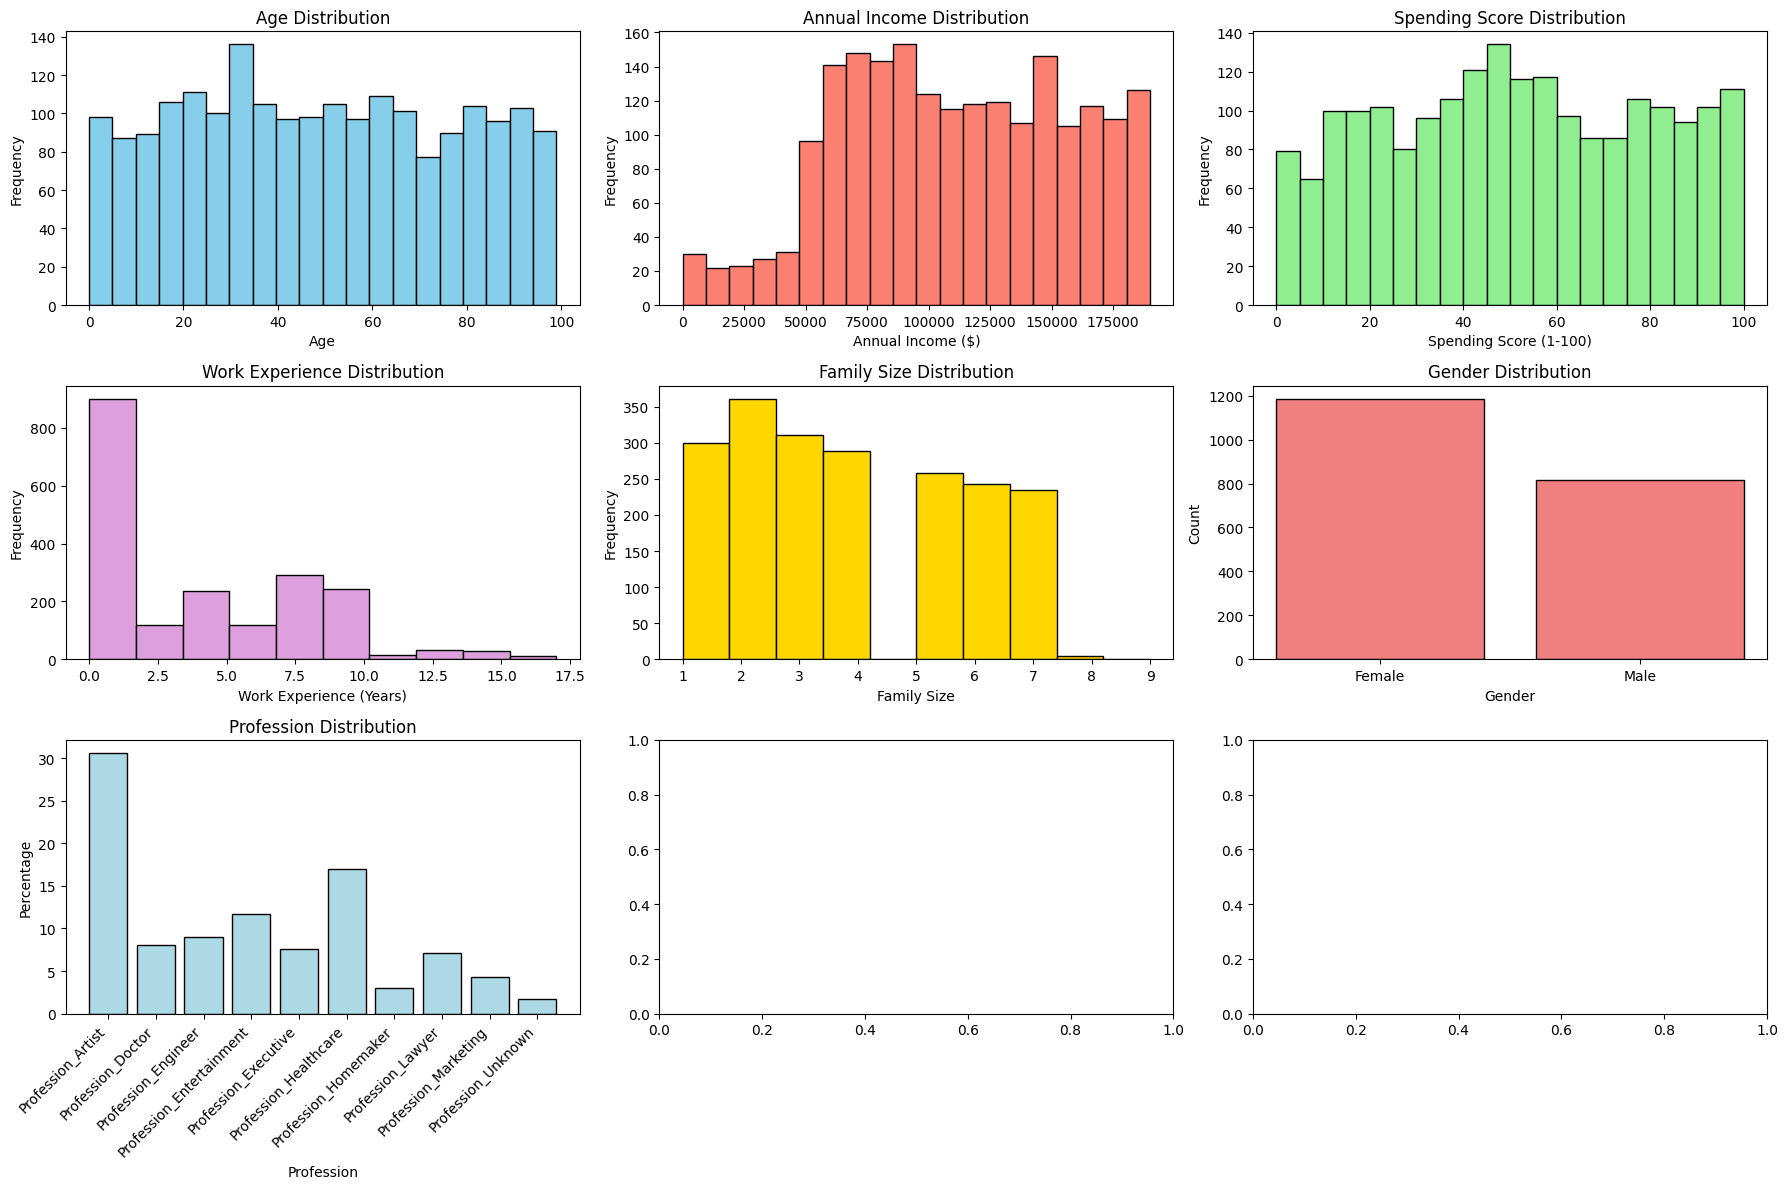

In [15]:
fig, axs = plt.subplots(3, 3, figsize=(18, 12), squeeze=False)

axs[0, 0].hist(df['Age'], bins=20, edgecolor='black', color='skyblue')
axs[0, 0].set_title('Age Distribution')
axs[0, 0].set_xlabel('Age')
axs[0, 0].set_ylabel('Frequency')

axs[0, 1].hist(df['Annual Income ($)'], bins=20, edgecolor='black', color='salmon')
axs[0, 1].set_title('Annual Income Distribution')
axs[0, 1].set_xlabel('Annual Income ($)')
axs[0, 1].set_ylabel('Frequency')

axs[0, 2].hist(df['Spending Score (1-100)'], bins=20, edgecolor='black', color='lightgreen')
axs[0, 2].set_title('Spending Score Distribution')
axs[0, 2].set_xlabel('Spending Score (1-100)')
axs[0, 2].set_ylabel('Frequency')

axs[1, 0].hist(df['Work Experience'], bins=10, edgecolor='black', color='plum')
axs[1, 0].set_title('Work Experience Distribution')
axs[1, 0].set_xlabel('Work Experience (Years)')
axs[1, 0].set_ylabel('Frequency')

axs[1, 1].hist(df['Family Size'], bins=10, edgecolor='black', color='gold')
axs[1, 1].set_title('Family Size Distribution')
axs[1, 1].set_xlabel('Family Size')
axs[1, 1].set_ylabel('Frequency')

axs[1, 2].bar(['Female', 'Male'], [df['Gender_Female'].sum(), df['Gender_Male'].sum()], edgecolor='black', color='lightcoral')
axs[1, 2].set_title('Gender Distribution')
axs[1, 2].set_xlabel('Gender')
axs[1, 2].set_ylabel('Count')

profession_columns = [
    'Profession_Artist', 'Profession_Doctor', 'Profession_Engineer', 'Profession_Entertainment', 
    'Profession_Executive', 'Profession_Healthcare', 'Profession_Homemaker', 'Profession_Lawyer', 
    'Profession_Marketing', 'Profession_Unknown'
]

profession_counts = [df[profession].sum() for profession in profession_columns]
total_profession_count = sum(profession_counts)
profession_percentages = [count / total_profession_count * 100 for count in profession_counts]

axs[2, 0].bar(profession_columns, profession_percentages, edgecolor='black', color='lightblue')
axs[2, 0].set_title('Profession Distribution')
axs[2, 0].set_xlabel('Profession')
axs[2, 0].set_ylabel('Percentage')
axs[2, 0].set_xticklabels(profession_columns, rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [16]:
num_cols = ['Age', 'Annual Income ($)', 'Spending Score (1-100)', 'Work Experience', 'Family Size']

z_scores = np.abs(stats.zscore(df[num_cols]))
outlier_mask = z_scores > 3

df = df[~outlier_mask.any(axis=1)].reset_index(drop=True)

df_og = df.copy(deep=True)

In [17]:
scaler = StandardScaler()

df_scaled = scaler.fit_transform(df_og[num_cols])

df_scaled = pd.DataFrame(df_scaled, columns=num_cols)

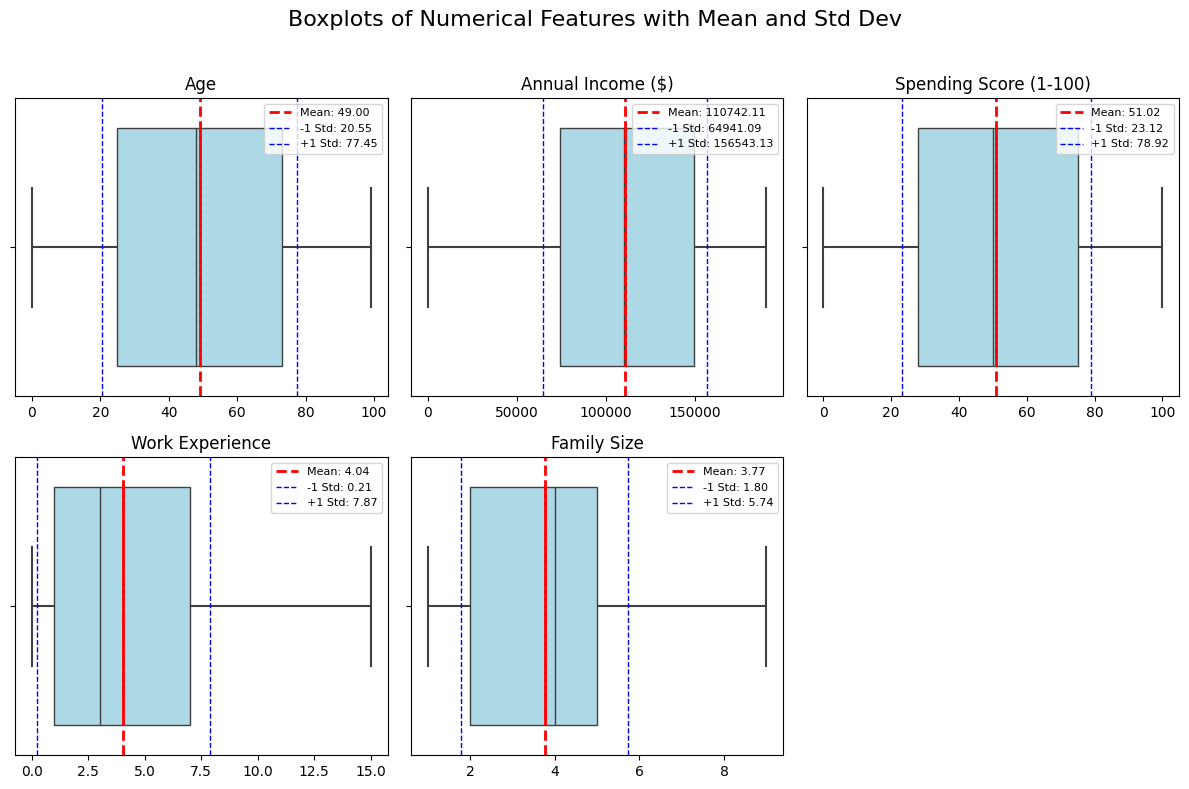

In [18]:
n_rows, n_cols = 2, 3

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 8))
fig.suptitle("Boxplots of Numerical Features with Mean and Std Dev", fontsize=16)

axes = axes.flatten()

for i, col in enumerate(num_cols):
    ax = axes[i]
    sns.boxplot(x=df[col], ax=ax, showmeans=True, meanline=True,
                meanprops={"color": "red", "linewidth": 2},
                boxprops={"facecolor": "lightblue"},
                whiskerprops={"linewidth": 1.5},
                capprops={"linewidth": 1.5},
                flierprops={"marker": "o", "markerfacecolor": "red", "markersize": 4})
    
    mean = df[col].mean()
    std = df[col].std()
    
    ax.axvline(mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean:.2f}')
    ax.axvline(mean - std, color='blue', linestyle='dashed', linewidth=1, label=f'-1 Std: {mean-std:.2f}')
    ax.axvline(mean + std, color='blue', linestyle='dashed', linewidth=1, label=f'+1 Std: {mean+std:.2f}')
    
    ax.set_title(f'{col}')
    ax.set_xlabel("")
    ax.legend(fontsize=8)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])
  
plt.tight_layout(rect=[0, 0, 1, 0.96])

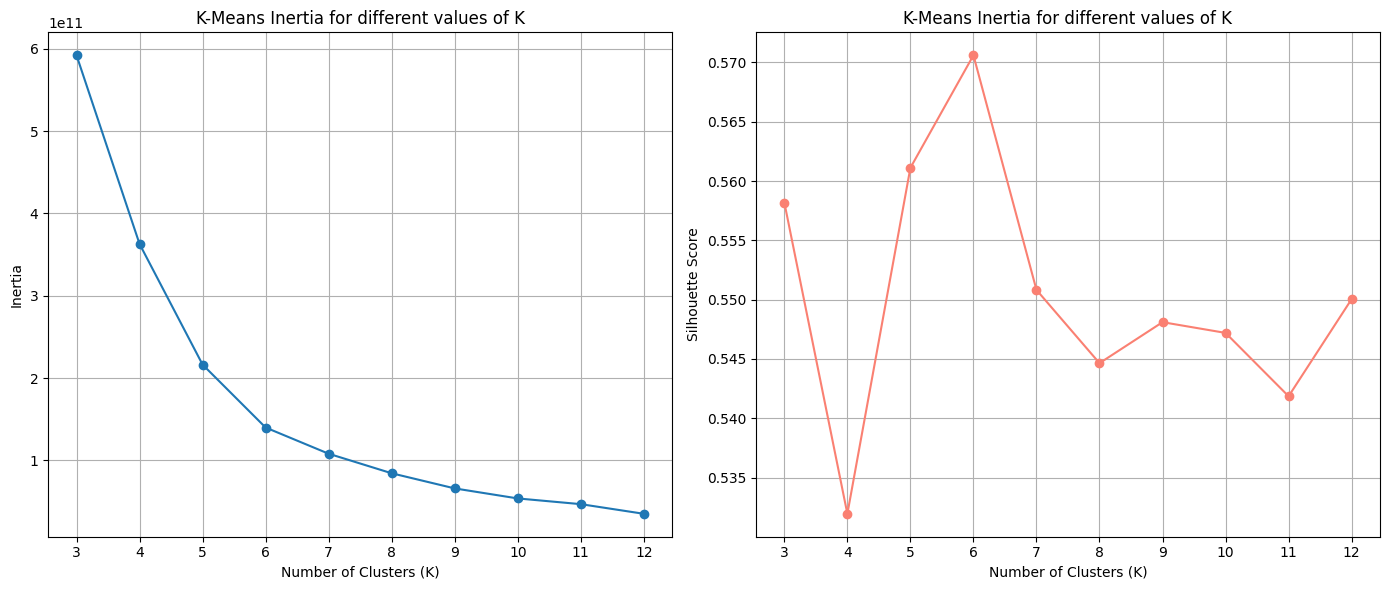

In [19]:
max_k = 12
inertia = []
silhouette_scores = []
k_values = range(3, max_k + 1)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, max_iter = 1000)
    cluster_labels = kmeans.fit_predict(df)
    sil_score = silhouette_score(df, cluster_labels)
    silhouette_scores.append(sil_score)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o')
plt.title('K-Means Inertia for different values of K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o', color='salmon')
plt.title('K-Means Inertia for different values of K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid()

plt.tight_layout()
plt.show()

In [20]:
kmeans = KMeans(n_clusters=6, random_state=42, max_iter = 1000)

cluster_labels = kmeans.fit_predict(df)

cluster_labels

array([2, 2, 0, ..., 0, 5, 3], shape=(1990,), dtype=int32)

In [21]:
cluster_labels = pd.Series(cluster_labels, name='Cluster')
df['Cluster'] = cluster_labels
df.head()

,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size,Gender_Female,Gender_Male,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Profession_Unknown,Cluster
0,19,15000,39,1,4,0,1,0,0,0,0,0,1,0,0,0,0,2
1,21,35000,81,3,3,0,1,0,0,1,0,0,0,0,0,0,0,2
2,20,86000,6,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0
3,23,59000,77,0,2,1,0,0,0,0,0,0,0,0,1,0,0,4
4,31,38000,40,2,6,1,0,0,0,0,1,0,0,0,0,0,0,2


c:\Users\uniqu\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


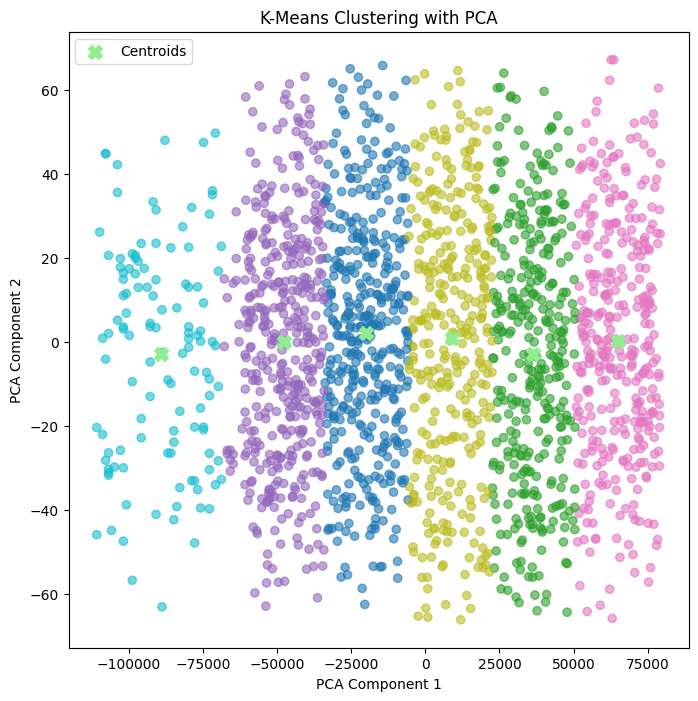

In [22]:
kmeans = KMeans(n_clusters=6, random_state=42, n_init=10)

df['Cluster'] = kmeans.fit_predict(df[num_cols])

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df[num_cols])

centroids_pca = pca.transform(kmeans.cluster_centers_)

plt.figure(figsize=(8, 8))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df['Cluster'], cmap='tab10', alpha=0.6)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='lightgreen', marker='X', s=100, label='Centroids')

plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("K-Means Clustering with PCA")
plt.legend()
plt.show()


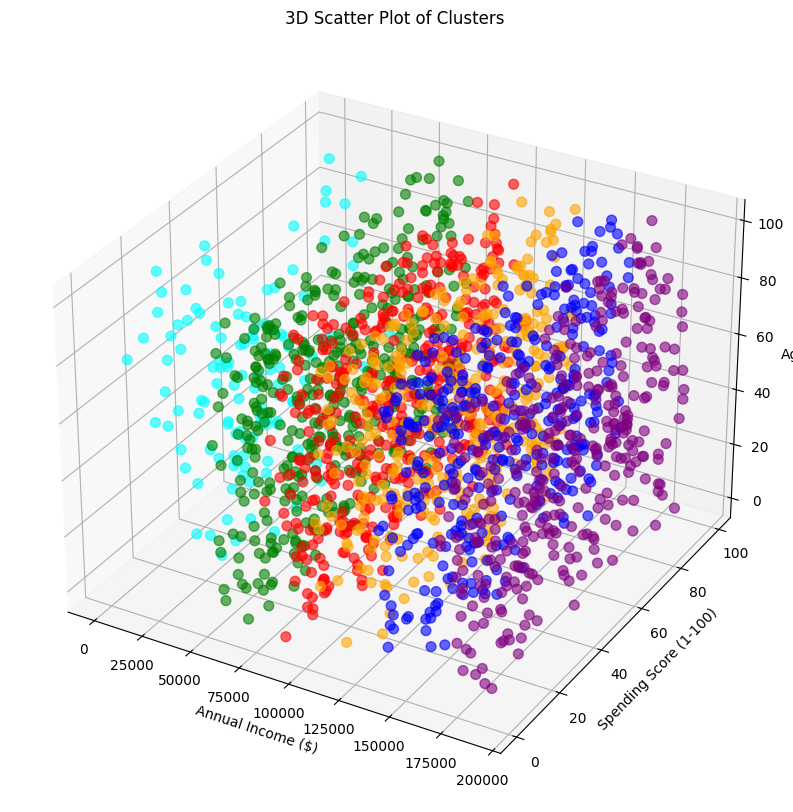

In [23]:
cluster_colors = {
    0: 'red',
    1: 'blue',
    2: 'green',
    3: 'purple',
    4: 'orange',
    5: 'cyan'
}
colors = [cluster_colors[label] for label in df['Cluster']]
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

scatter = ax.scatter(df['Annual Income ($)'], df['Age'], df['Spending Score (1-100)'], c=colors, s=50, alpha=0.6)
ax.set_xlabel('Annual Income ($)')
ax.set_ylabel('Spending Score (1-100)')
ax.set_zlabel('Age')

ax.set_title('3D Scatter Plot of Clusters')
plt.show()

In [24]:
cluster_counts = df['Cluster'].value_counts().sort_index()
print(cluster_counts)

Cluster
0    411
1    353
2    416
3    351
4    340
5    119
Name: count, dtype: int64


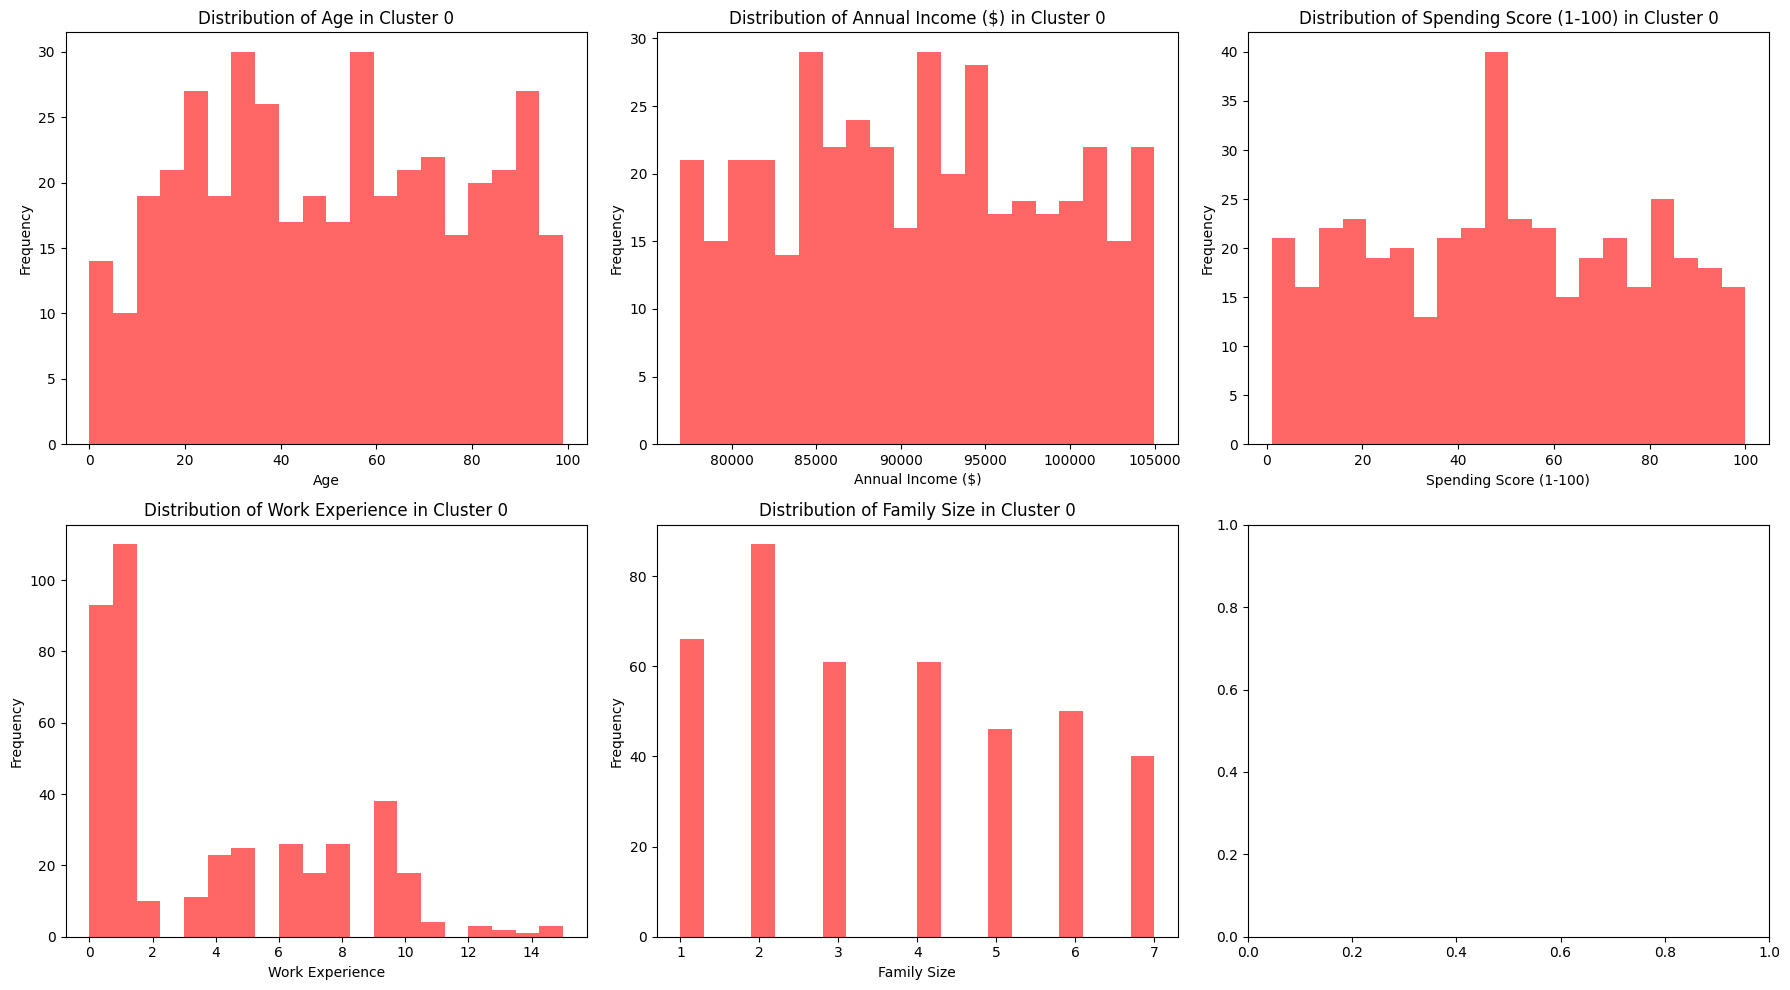

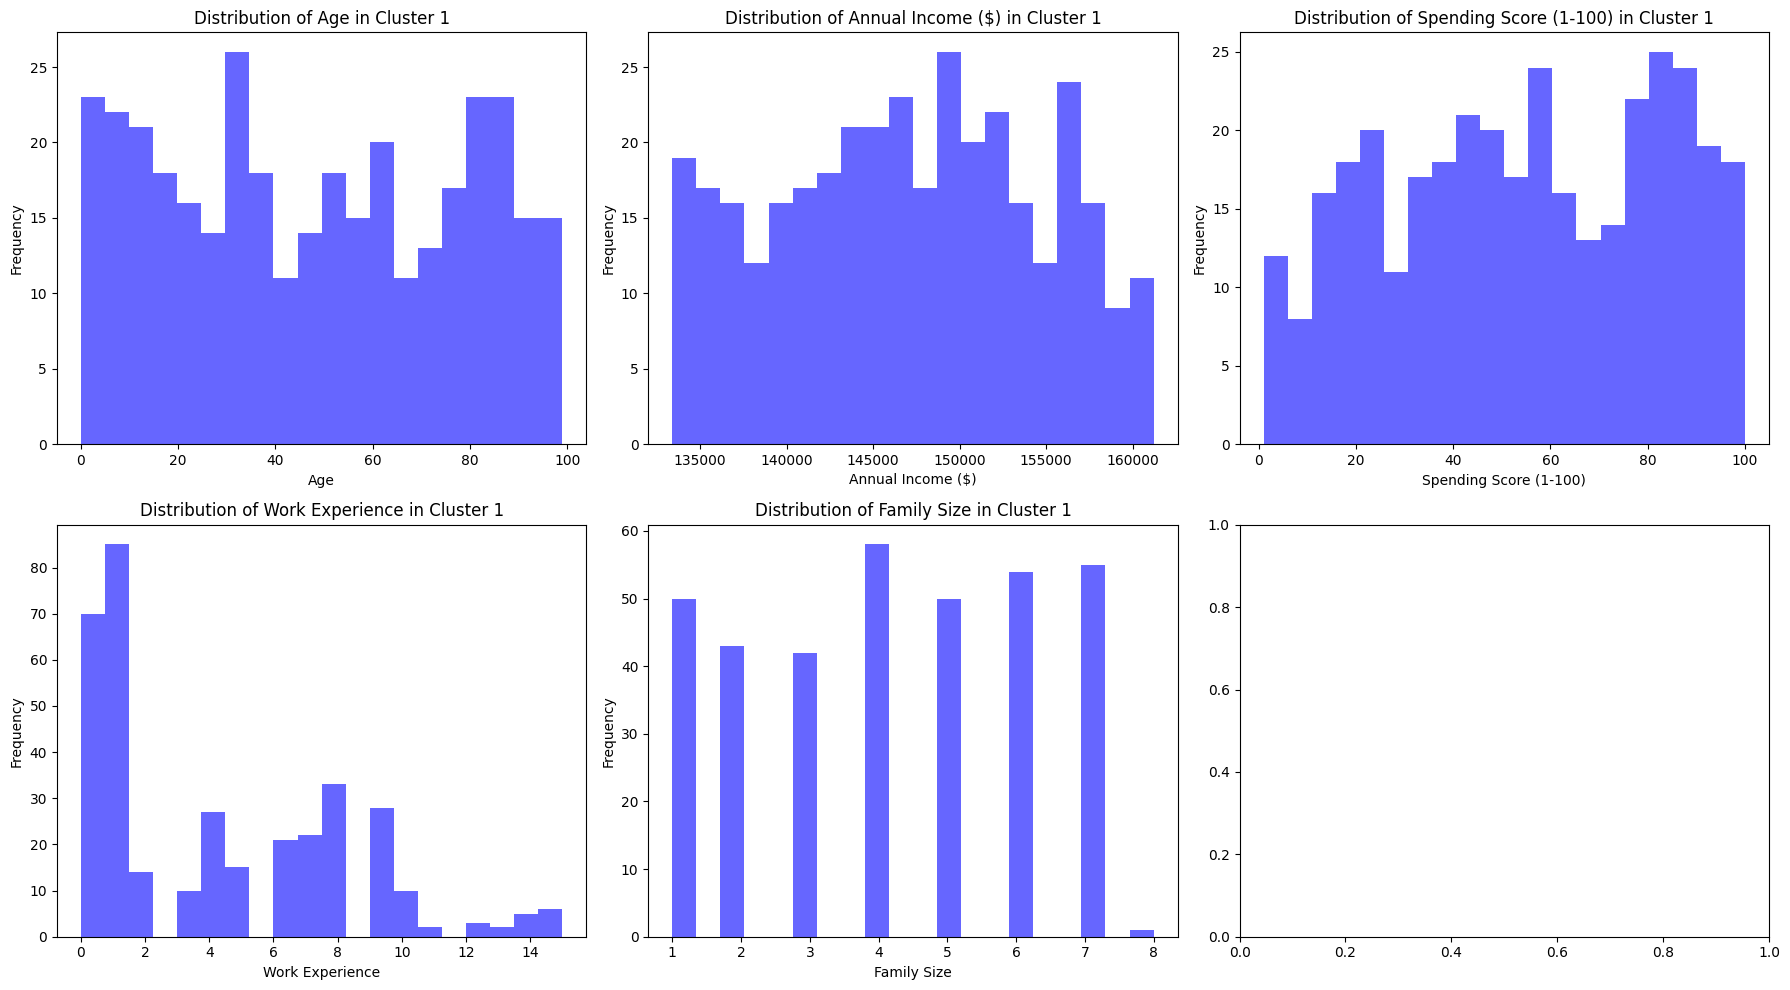

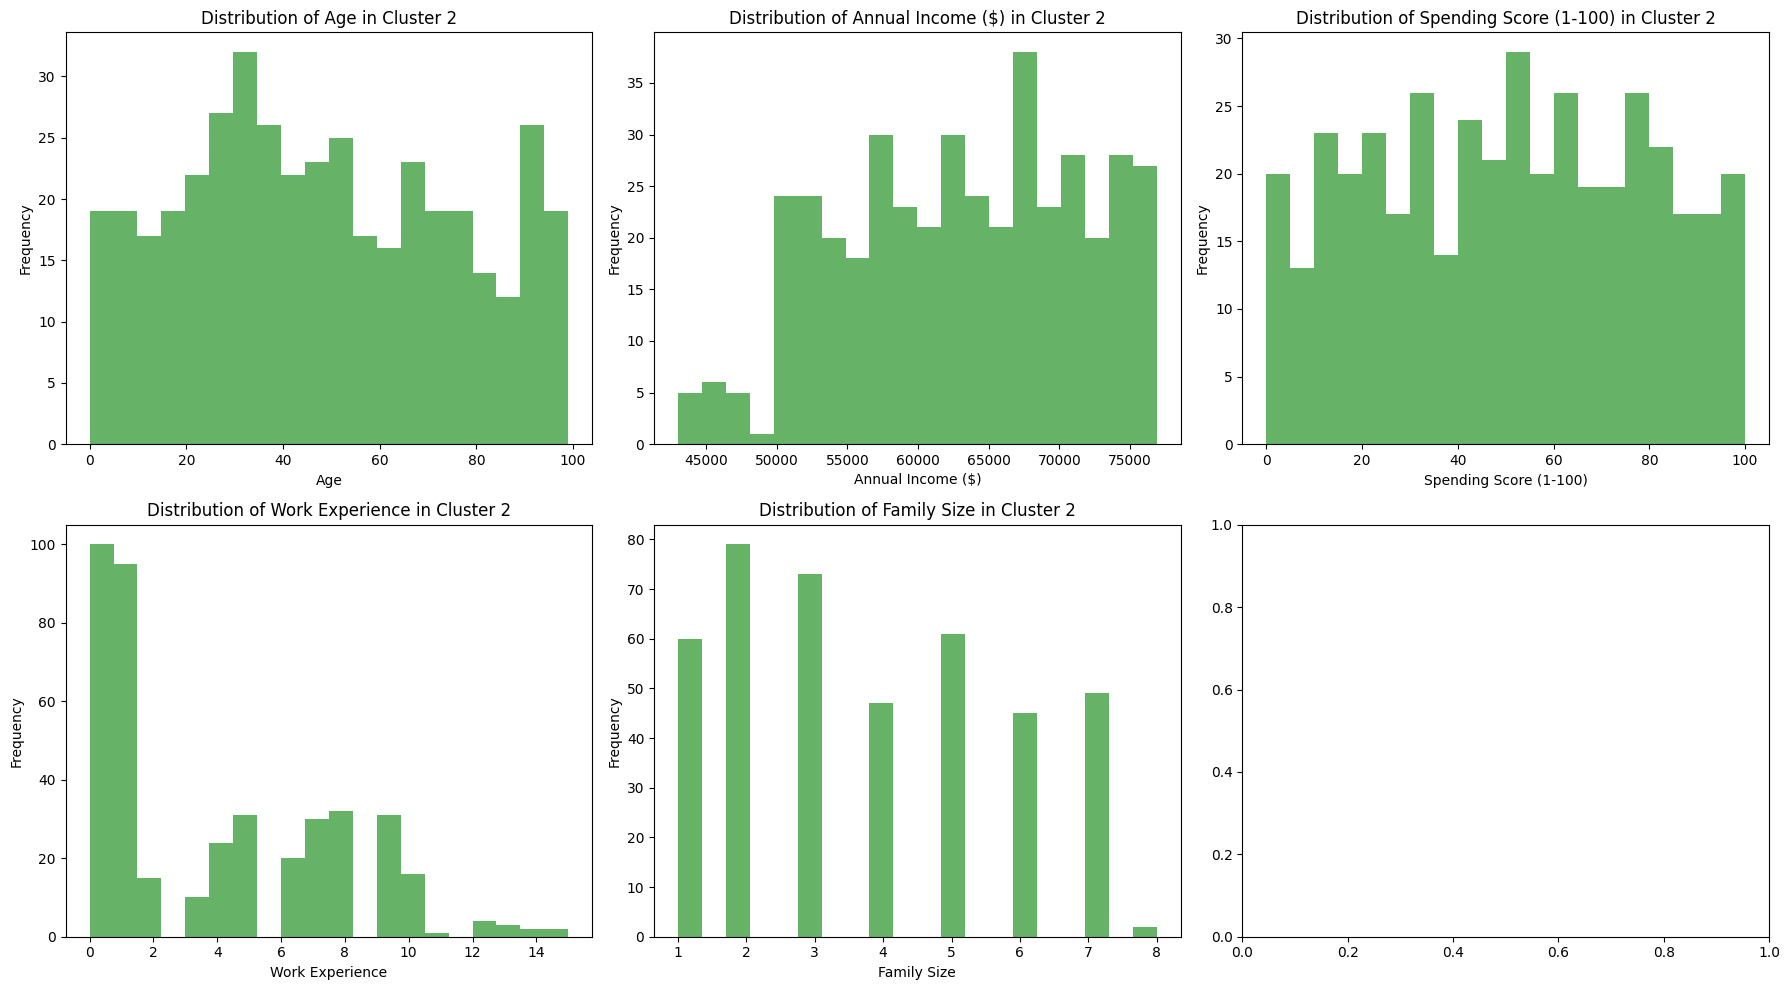

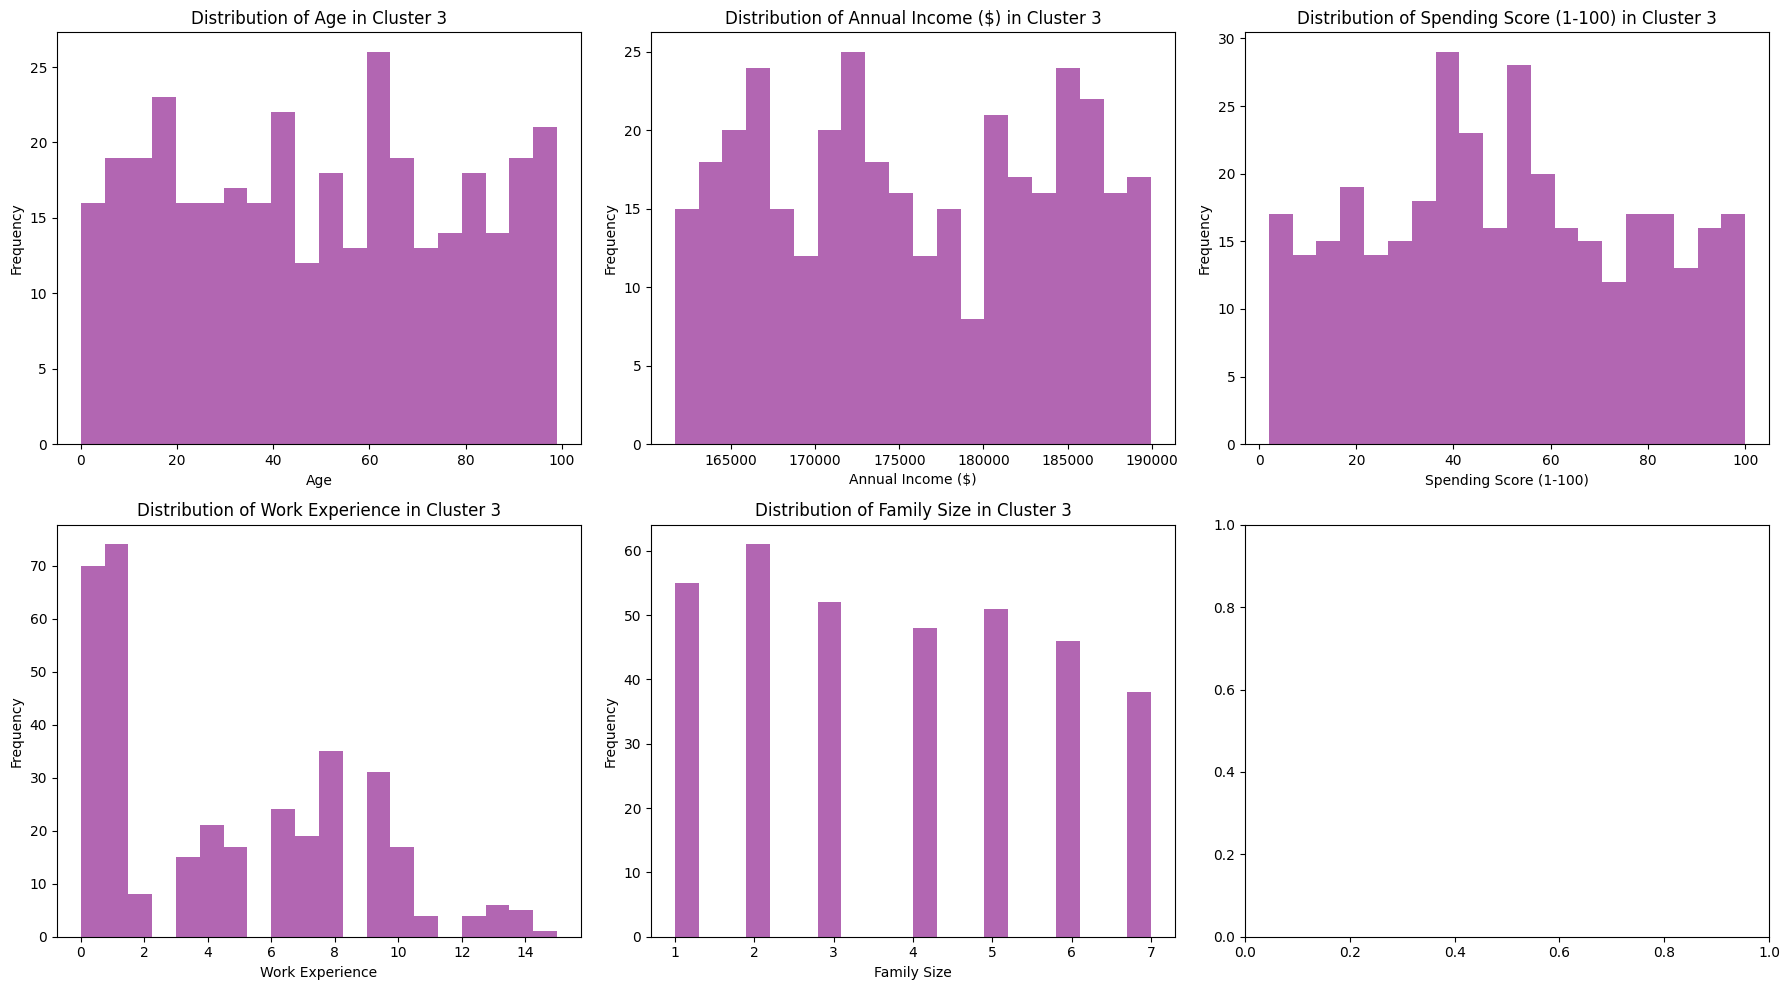

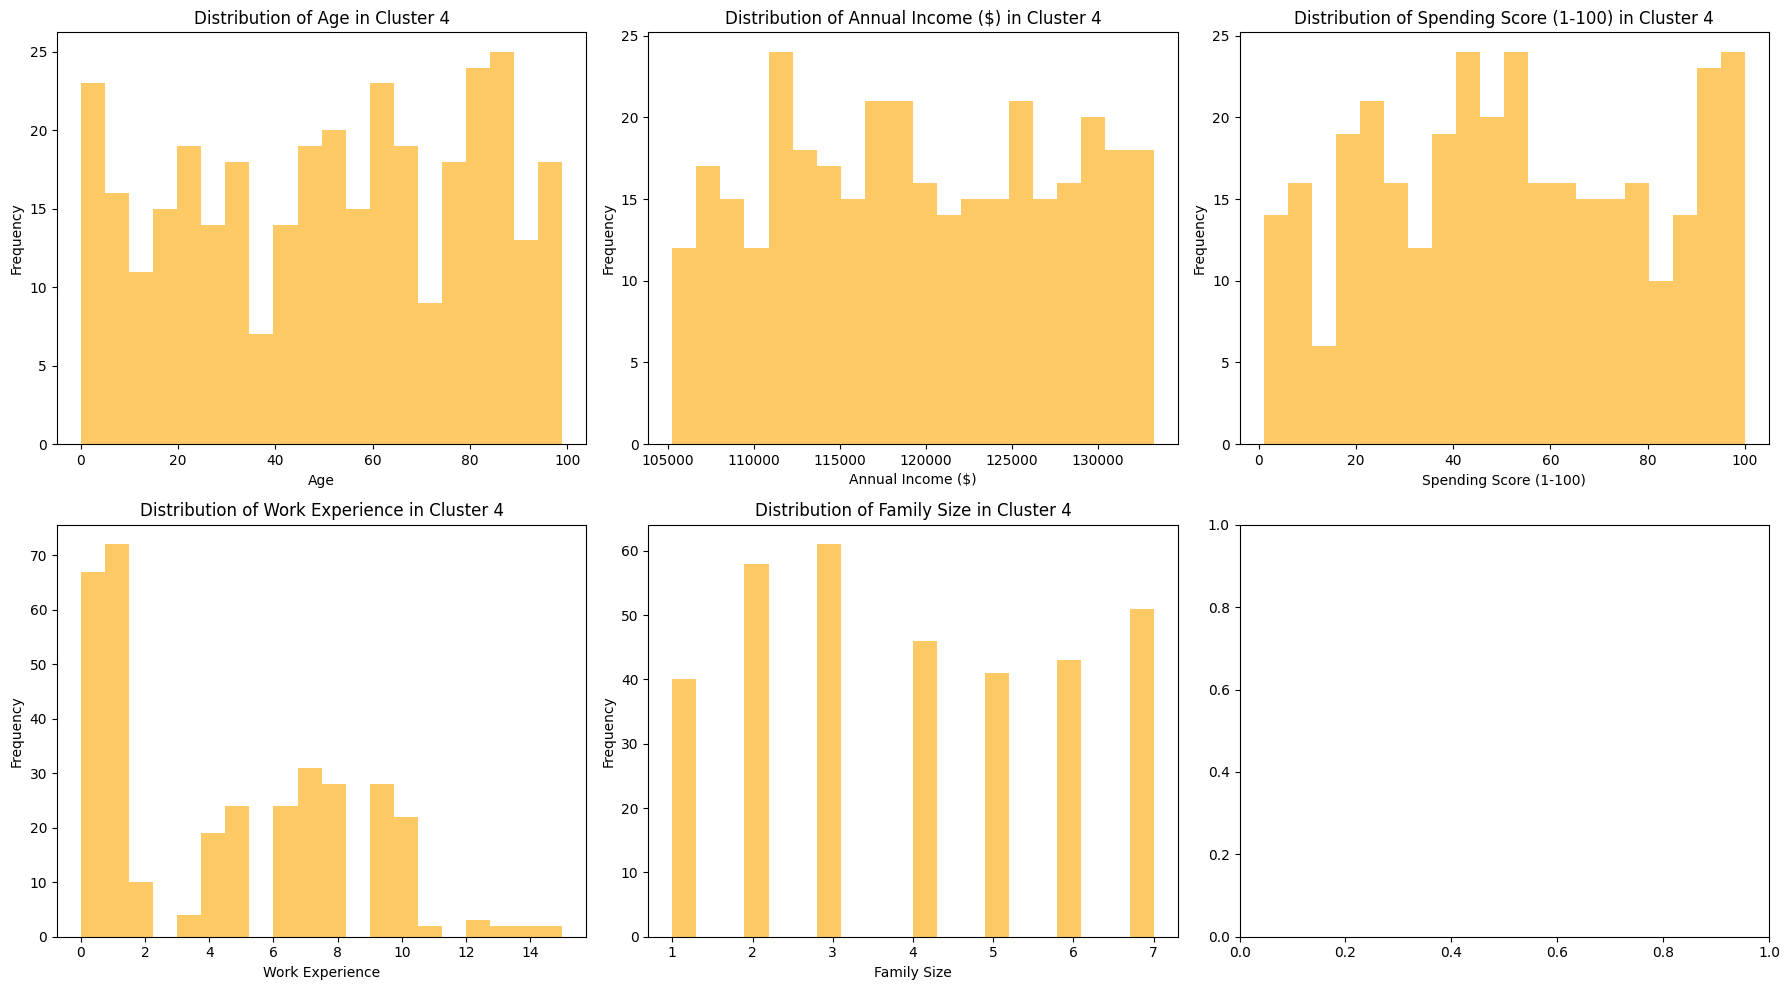

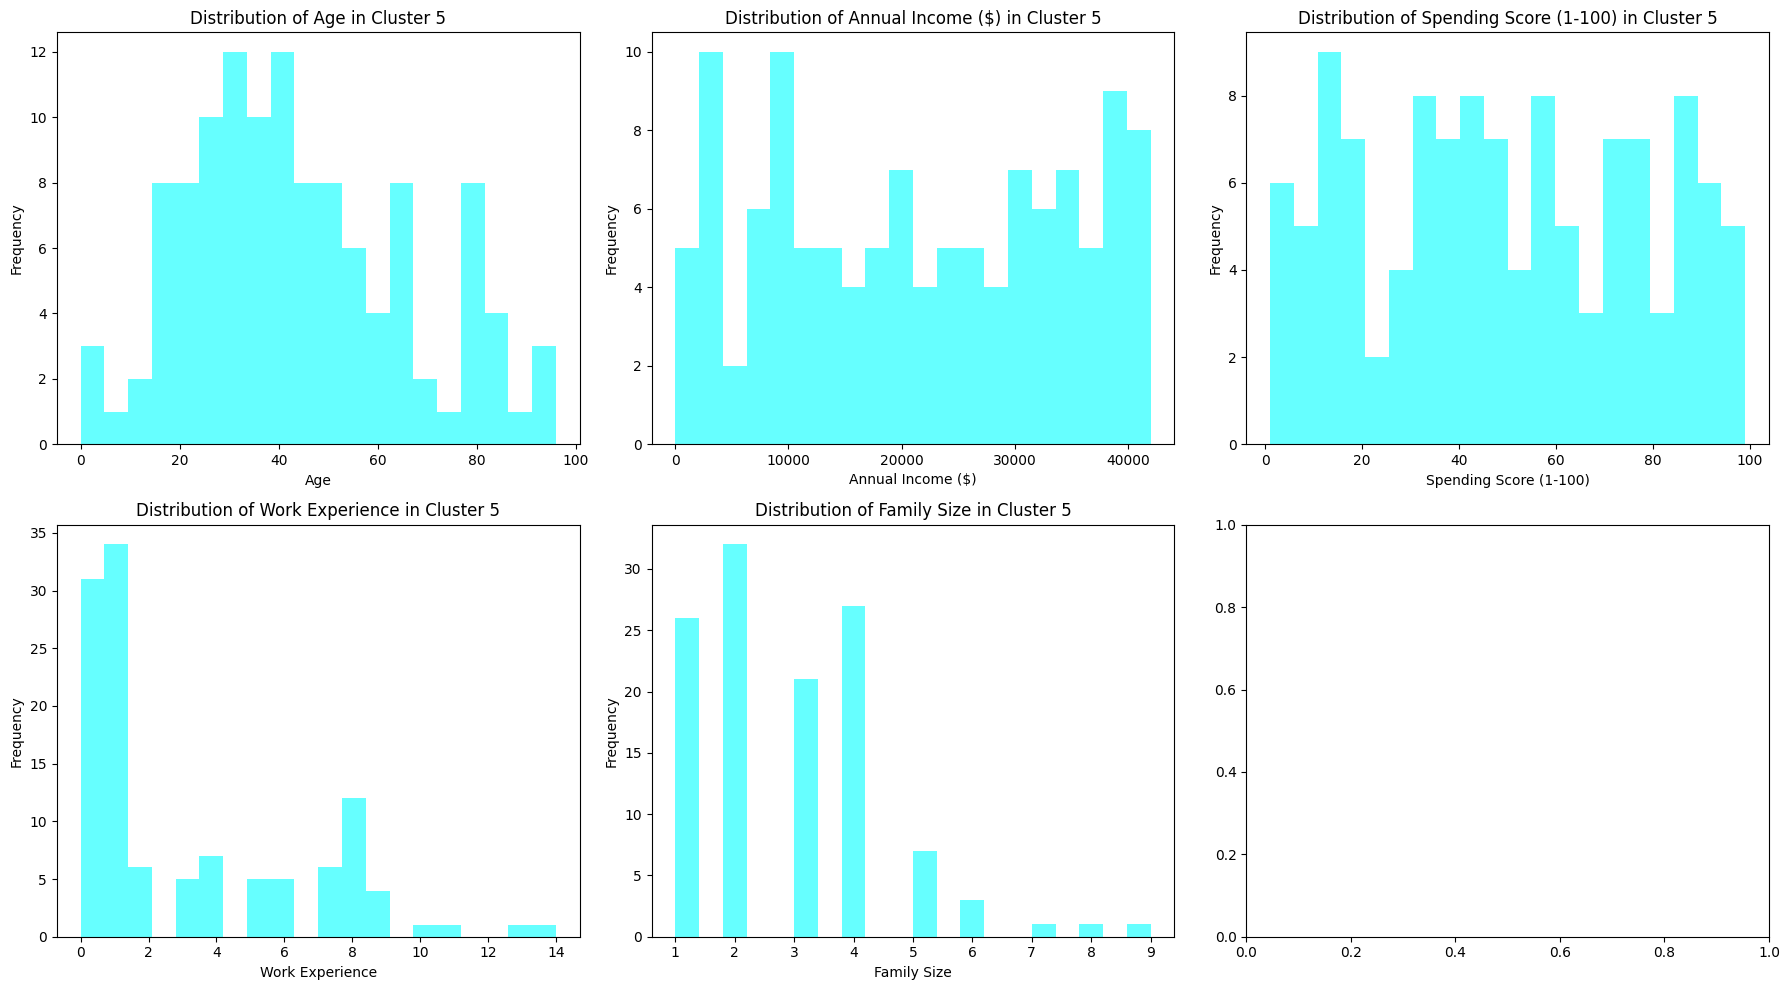

In [25]:
cluster_columns = ['Age', 'Annual Income ($)', 'Spending Score (1-100)', 'Work Experience', 'Family Size']
cluster_colors = {
    0: 'red',
    1: 'blue',
    2: 'green',
    3: 'purple',
    4: 'orange',
    5: 'cyan'
}

for cluster in range(6):
    fig, axs = plt.subplots(2, 3, figsize=(18, 10), squeeze=False)
    for i, col in enumerate(cluster_columns):
        ax = axs[i // 3, i % 3]
        ax.hist(df[df['Cluster'] == cluster][col], bins=20, color=cluster_colors[cluster], alpha=0.6)
        ax.set_xlabel(col)
        ax.set_ylabel('Frequency')
        ax.set_title(f'Distribution of {col} in Cluster {cluster}')
    
    plt.tight_layout()
    plt.show()

In [26]:
cluster_summary = df.groupby('Cluster')[['Age', 'Annual Income ($)', 'Spending Score (1-100)', 'Work Experience', 'Family Size']].agg(['mean', 'std', 'min', 'max'])
cluster_summary.to_csv('cluster_summary.csv', index=True)
print(cluster_summary)

               Age                    Annual Income ($)                        \
              mean        std min max              mean           std     min   
Cluster                                                                         
0        50.683698  27.634764   0  99      90843.540146   7869.709236   76979   
1        47.708215  29.952280   0  99     147054.781870   7548.618556  133400   
2        48.021635  27.734316   0  99      63019.105769   8436.989194   43000   
3        49.159544  29.320742   0  99     175774.772080   8294.248021  161646   
4        51.055882  29.560395   0  99     119555.529412   7988.396482  105255   
5        44.100840  22.142219   0  96      21579.831933  12734.243037       0   

                Spending Score (1-100)                     Work Experience  \
            max                   mean        std min  max            mean   
Cluster                                                                      
0        104974              49.8199